In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setup paths
results_dir = Path('../results')
figures_dir = Path('../figures')
figures_dir.mkdir(exist_ok=True)

# Load LSTM training histories
with open(results_dir / 'lstm_baseline/study1/train_history.json', 'r') as f:
    lstm_s1 = json.load(f)

with open(results_dir / 'lstm_baseline/study2/train_history.json', 'r') as f:
    lstm_s2 = json.load(f)

# Load Transformer training histories
with open(results_dir / 'transformer/study1/train_history.json', 'r') as f:
    trans_s1 = json.load(f)

with open(results_dir / 'transformer/study2/train_history.json', 'r') as f:
    trans_s2 = json.load(f)

# Load LSTM evaluation results
with open(results_dir / 'lstm_baseline/evaluation_results.json', 'r') as f:
    lstm_eval = json.load(f)

# Try to load Transformer evaluation results
try:
    with open(results_dir / 'transformer/evaluation_results.json', 'r') as f:
        trans_eval = json.load(f)
    trans_ood_s1 = trans_eval['study1']['ood']
    trans_ood_s2 = trans_eval['study2']['ood']
except FileNotFoundError:
    trans_ood_s1 = 0.0
    trans_ood_s2 = 0.0
    print("⚠️  Transformer evaluation results not found. Run: python ../main.py --mode eval --model transformer")

# Build results dictionary from files
results = {
    'lstm': {
        'study1': {
            'train': lstm_s1['train_accuracies'][-1],
            'val': lstm_s1['val_accuracies'][-1],
            'ood': lstm_eval['study1']['ood']
        },
        'study2': {
            'train': lstm_s2['train_accuracies'][-1],
            'val': lstm_s2['val_accuracies'][-1],
            'ood': lstm_eval['study2']['ood']
        }
    },
    'transformer': {
        'study1': {
            'train': trans_s1['train_accuracies'][-1],
            'val': trans_s1['val_accuracies'][-1],
            'ood': trans_ood_s1
        },
        'study2': {
            'train': trans_s2['train_accuracies'][-1],
            'val': trans_s2['val_accuracies'][-1],
            'ood': trans_ood_s2
        }
    }
}

print("✓ All data loaded from files\n")
print("Final Accuracies:")
print(f"  LSTM Study 1   → Train: {results['lstm']['study1']['train']:.2f}% | Val: {results['lstm']['study1']['val']:.2f}% | OOD: {results['lstm']['study1']['ood']:.2f}%")
print(f"  LSTM Study 2   → Train: {results['lstm']['study2']['train']:.2f}% | Val: {results['lstm']['study2']['val']:.2f}% | OOD: {results['lstm']['study2']['ood']:.2f}%")
print(f"  Transformer Study 1 → Train: {results['transformer']['study1']['train']:.2f}% | Val: {results['transformer']['study1']['val']:.2f}% | OOD: {results['transformer']['study1']['ood']:.2f}%")
print(f"  Transformer Study 2 → Train: {results['transformer']['study2']['train']:.2f}% | Val: {results['transformer']['study2']['val']:.2f}% | OOD: {results['transformer']['study2']['ood']:.2f}%")


✓ All data loaded from files

Final Accuracies:
  LSTM Study 1   → Train: 95.14% | Val: 38.20% | OOD: 1.80%
  LSTM Study 2   → Train: 89.19% | Val: 15.90% | OOD: 10.40%
  Transformer Study 1 → Train: 56.66% | Val: 12.10% | OOD: 0.40%
  Transformer Study 2 → Train: 51.34% | Val: 5.70% | OOD: 2.30%


✅ Figure 3 saved: figures/training_curves.png


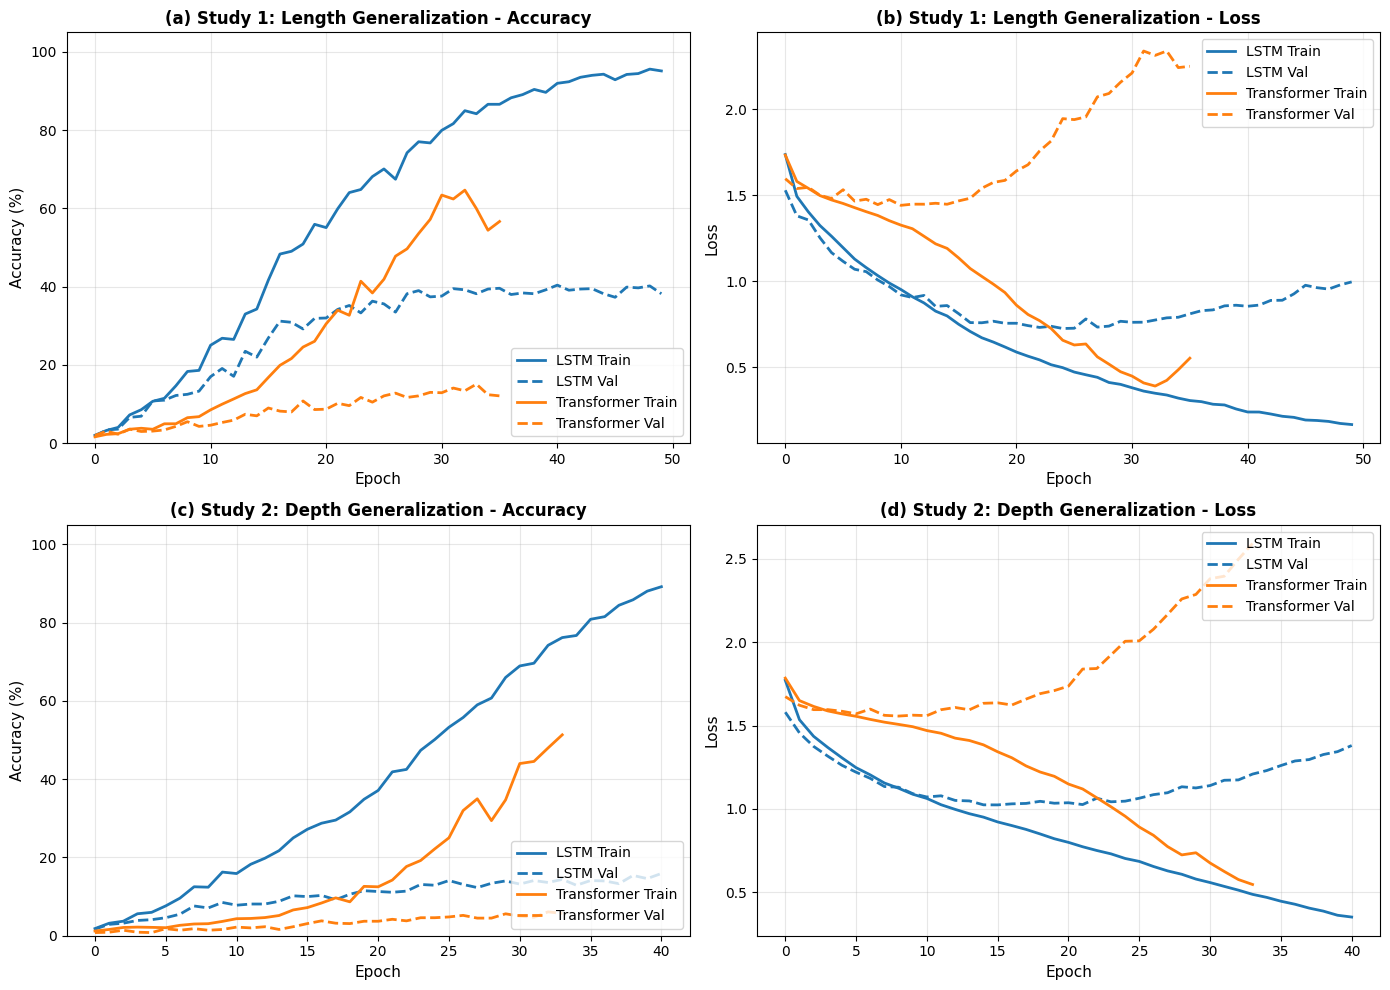

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Study 1 - Accuracy
axes[0, 0].plot(lstm_s1['train_accuracies'], label='LSTM Train', linewidth=2, color='#1f77b4')
axes[0, 0].plot(lstm_s1['val_accuracies'], label='LSTM Val', linewidth=2, color='#1f77b4', linestyle='--')
axes[0, 0].plot(trans_s1['train_accuracies'], label='Transformer Train', linewidth=2, color='#ff7f0e')
axes[0, 0].plot(trans_s1['val_accuracies'], label='Transformer Val', linewidth=2, color='#ff7f0e', linestyle='--')
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=11)
axes[0, 0].set_title('(a) Study 1: Length Generalization - Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].legend(loc='lower right', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim([0, 105])

# Study 1 - Loss
axes[0, 1].plot(lstm_s1['train_losses'], label='LSTM Train', linewidth=2, color='#1f77b4')
axes[0, 1].plot(lstm_s1['val_losses'], label='LSTM Val', linewidth=2, color='#1f77b4', linestyle='--')
axes[0, 1].plot(trans_s1['train_losses'], label='Transformer Train', linewidth=2, color='#ff7f0e')
axes[0, 1].plot(trans_s1['val_losses'], label='Transformer Val', linewidth=2, color='#ff7f0e', linestyle='--')
axes[0, 1].set_xlabel('Epoch', fontsize=11)
axes[0, 1].set_ylabel('Loss', fontsize=11)
axes[0, 1].set_title('(b) Study 1: Length Generalization - Loss', fontsize=12, fontweight='bold')
axes[0, 1].legend(loc='upper right', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Study 2 - Accuracy
axes[1, 0].plot(lstm_s2['train_accuracies'], label='LSTM Train', linewidth=2, color='#1f77b4')
axes[1, 0].plot(lstm_s2['val_accuracies'], label='LSTM Val', linewidth=2, color='#1f77b4', linestyle='--')
axes[1, 0].plot(trans_s2['train_accuracies'], label='Transformer Train', linewidth=2, color='#ff7f0e')
axes[1, 0].plot(trans_s2['val_accuracies'], label='Transformer Val', linewidth=2, color='#ff7f0e', linestyle='--')
axes[1, 0].set_xlabel('Epoch', fontsize=11)
axes[1, 0].set_ylabel('Accuracy (%)', fontsize=11)
axes[1, 0].set_title('(c) Study 2: Depth Generalization - Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].legend(loc='lower right', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim([0, 105])

# Study 2 - Loss
axes[1, 1].plot(lstm_s2['train_losses'], label='LSTM Train', linewidth=2, color='#1f77b4')
axes[1, 1].plot(lstm_s2['val_losses'], label='LSTM Val', linewidth=2, color='#1f77b4', linestyle='--')
axes[1, 1].plot(trans_s2['train_losses'], label='Transformer Train', linewidth=2, color='#ff7f0e')
axes[1, 1].plot(trans_s2['val_losses'], label='Transformer Val', linewidth=2, color='#ff7f0e', linestyle='--')
axes[1, 1].set_xlabel('Epoch', fontsize=11)
axes[1, 1].set_ylabel('Loss', fontsize=11)
axes[1, 1].set_title('(d) Study 2: Depth Generalization - Loss', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'training_curves.png', dpi=300, bbox_inches='tight')
print("✅ Figure 3 saved: figures/training_curves.png")
plt.show()

✅ Figure 4 saved: figures/generalization_gap.png


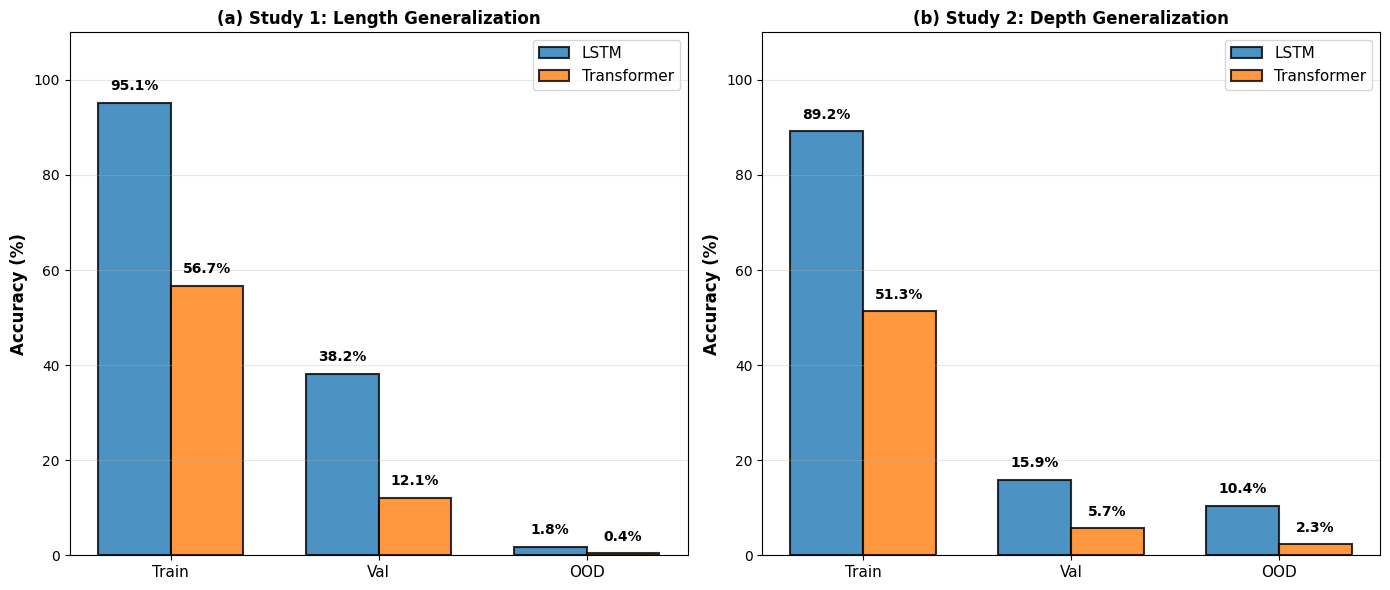

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = np.arange(3)
width = 0.35

# Study 1
lstm_vals_s1 = [results['lstm']['study1']['train'], 
                results['lstm']['study1']['val'], 
                results['lstm']['study1']['ood']]
trans_vals_s1 = [results['transformer']['study1']['train'], 
                 results['transformer']['study1']['val'], 
                 results['transformer']['study1']['ood']]

bars1 = axes[0].bar(x - width/2, lstm_vals_s1, width, label='LSTM', 
                    color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = axes[0].bar(x + width/2, trans_vals_s1, width, label='Transformer',
                    color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1.5)

axes[0].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[0].set_title('(a) Study 1: Length Generalization', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Train', 'Val', 'OOD'], fontsize=11)
axes[0].legend(fontsize=11)
axes[0].set_ylim([0, 110])
axes[0].grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Study 2
lstm_vals_s2 = [results['lstm']['study2']['train'], 
                results['lstm']['study2']['val'], 
                results['lstm']['study2']['ood']]
trans_vals_s2 = [results['transformer']['study2']['train'], 
                 results['transformer']['study2']['val'], 
                 results['transformer']['study2']['ood']]

bars3 = axes[1].bar(x - width/2, lstm_vals_s2, width, label='LSTM',
                    color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=1.5)
bars4 = axes[1].bar(x + width/2, trans_vals_s2, width, label='Transformer',
                    color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1.5)

axes[1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[1].set_title('(b) Study 2: Depth Generalization', fontsize=12, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Train', 'Val', 'OOD'], fontsize=11)
axes[1].legend(fontsize=11)
axes[1].set_ylim([0, 110])
axes[1].grid(True, alpha=0.3, axis='y')

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_dir / 'generalization_gap.png', dpi=300, bbox_inches='tight')
print("✅ Figure 4 saved: figures/generalization_gap.png")
plt.show()

Figure saved: figures/model_comparison.png


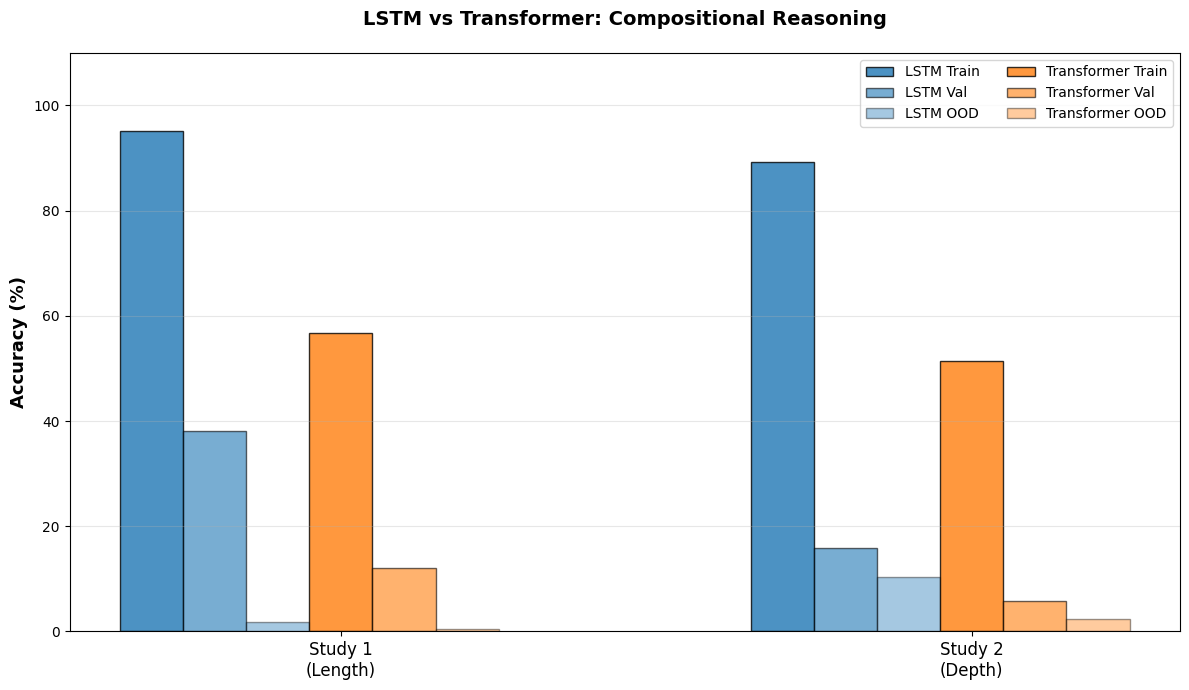

In [2]:
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(2)
width = 0.10

# Data
lstm_train = [results['lstm']['study1']['train'], results['lstm']['study2']['train']]
lstm_val = [results['lstm']['study1']['val'], results['lstm']['study2']['val']]
lstm_ood = [results['lstm']['study1']['ood'], results['lstm']['study2']['ood']]

trans_train = [results['transformer']['study1']['train'], results['transformer']['study2']['train']]
trans_val = [results['transformer']['study1']['val'], results['transformer']['study2']['val']]
trans_ood = [results['transformer']['study1']['ood'], results['transformer']['study2']['ood']]

# Plot bars
ax.bar(x - 2*width, lstm_train, width, label='LSTM Train', color='#1f77b4', alpha=0.8, edgecolor='black')
ax.bar(x - width, lstm_val, width, label='LSTM Val', color='#1f77b4', alpha=0.6, edgecolor='black')
ax.bar(x, lstm_ood, width, label='LSTM OOD', color='#1f77b4', alpha=0.4, edgecolor='black')

ax.bar(x + width, trans_train, width, label='Transformer Train', color='#ff7f0e', alpha=0.8, edgecolor='black')
ax.bar(x + 2*width, trans_val, width, label='Transformer Val', color='#ff7f0e', alpha=0.6, edgecolor='black')
ax.bar(x + 3*width, trans_ood, width, label='Transformer OOD', color='#ff7f0e', alpha=0.4, edgecolor='black')

ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('LSTM vs Transformer: Compositional Reasoning', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels(['Study 1\n(Length)', 'Study 2\n(Depth)'], fontsize=12)
ax.legend(fontsize=10, loc='upper right', ncol=2)
ax.set_ylim([0, 110])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(figures_dir / 'model_comparison.png', dpi=300, bbox_inches='tight')
print("Figure saved: figures/model_comparison.png")
plt.show()

In [7]:
summary_data = {
    'Model': ['LSTM', 'LSTM', 'Transformer', 'Transformer'],
    'Study': ['Study 1 (Length)', 'Study 2 (Depth)', 'Study 1 (Length)', 'Study 2 (Depth)'],
    'Train Acc (%)': [
        results['lstm']['study1']['train'],
        results['lstm']['study2']['train'],
        results['transformer']['study1']['train'],
        results['transformer']['study2']['train']
    ],
    'Val Acc (%)': [
        results['lstm']['study1']['val'],
        results['lstm']['study2']['val'],
        results['transformer']['study1']['val'],
        results['transformer']['study2']['val']
    ],
    'OOD Acc (%)': [
        results['lstm']['study1']['ood'],
        results['lstm']['study2']['ood'],
        results['transformer']['study1']['ood'],
        results['transformer']['study2']['ood']
    ],
    'Gen Gap (%)': [
        results['lstm']['study1']['train'] - results['lstm']['study1']['ood'],
        results['lstm']['study2']['train'] - results['lstm']['study2']['ood'],
        results['transformer']['study1']['train'] - results['transformer']['study1']['ood'],
        results['transformer']['study2']['train'] - results['transformer']['study2']['ood']
    ]
}

df = pd.DataFrame(summary_data)
print("\n" + "="*90)
print("RESULTS SUMMARY")
print("="*90)
print(df.to_string(index=False))
print("="*90)

df.to_csv(figures_dir / 'results_summary.csv', index=False)
print("\n✅ Summary saved: figures/results_summary.csv")


RESULTS SUMMARY
      Model            Study  Train Acc (%)  Val Acc (%)  OOD Acc (%)  Gen Gap (%)
       LSTM Study 1 (Length)        95.1375         38.2          1.8      93.3375
       LSTM  Study 2 (Depth)        89.1875         15.9         10.4      78.7875
Transformer Study 1 (Length)        56.6625         12.1          0.4      56.2625
Transformer  Study 2 (Depth)        51.3375          5.7          2.3      49.0375

✅ Summary saved: figures/results_summary.csv
